# Atividade Spark SQL

Considerando o dataset detalhado a seguir, extraia o conjunto de informações solicitadas.

### Dataset dados da BOVESPA

- Arquivo disponível em /home/dados/bovespa/bovespa.csv
- Dados relativos a bovespa, a bolsa de valores no Brasil
- ~1.3GB
- 8.1M de instâncias


| #  	| Nome do campo                                                             	| Descrição                                                                        	|
|----	|---------------------------------------------------------------------------	|----------------------------------------------------------------------------------	|
| 0  	| RegisterType                                                             	| Fixo '1'                                                                                 	|
| 1  	| TradingDate                                                              	| Data do pregão                                                                   	|
| 2  	| BDICode                                                                  	| Utilizado para classificar os papéis na emissão do boletim diário de informações 	|
| 3  	| NegociationCode                                                          	| Codigo de negociação do papel                                                    	|
| 4  	| MarketType                                                               	| Cód. Do mercado em que o papel está cadastrado                                   	|
| 5  	| TradeName                                                                	| Nome resumido da empresa emissora do papel                                       	|
| 6  	| Specification                                                             	| Especificação do Papel                                                           	|
| 7  	| ForwardMarketTermInDays                                               	| Prazo em dias do mercado a termo                                                 	|
| 8  	| Currency                                                                  	| Moeda de referência                                                              	|
| 9  	| OpeningPrice                                                             	| Preço de abertura do papel no pregão                                             	|
| 10 	| MaxPrice                                                                	| Preço máximo do papel no pregão                                                  	|
| 11 	| MinPrice                                                                	| Preço mínimo do papel no pregão                                                  	|
| 12 	| MeanPrice                                                                	| Preço médio do papel no pregão                                                   	|
| 13 	| LastTradePrice                                                          	| Preço do último negócio do papel no pregão                                       	|
| 14 	| BestPurshaseOrderPrice                                                 	| Preço da melhor oferta de compra do papel no mercado                             	|
| 15 	| BestPurshaseSalePrice                                                  	| Preço da melhor oferta de venda do papel no mercado                              	|
| 16 	| NumborOfTrades                                                          	| Número de negócios efetuados com o papel no pregão                               	|
| 17 	| NumberOfTradedStocks                                                   	| Quantidade total de títulos negociados neste papel                               	|
| 18 	| VolumeOfTradedStocks                                                   	| Volume total de títulos negociados neste papel                                   	|
| 19 	| PriceForOptionsMarketOrSecondaryTermMarket                         	| Preço de exercício para o mercado de opções ou valor do contrato para o mercado  	|
| 20 	| PriceCorrectionsForOptionsMarketOrSecondaryTermMarket             	| Indicador de correção de preços de exercícios ou valores de contrato             	|
| 21 	| DueDateForOptionsMarketOrSecondaryTermMarket                      	| Data do vencimento para os mercados de opções                                    	|
| 22 	| FactorOfPaperQuotatuion                                                	| Fator de cotação do papel                                                        	|
| 23 	| PointsInPriceForOptionsMarketReferencedInDollarOrSecondaryTerm 	| Preço de exercício em pontos para opções referenciadas em dólar                  	|
| 24 	| ISINOrInternCode                                                       	| Código do papel no sistema ISIN                                                  	|
| 25 	| DistributionNumber                                                       	| Número de distribuição do papel                                                  	|

Informações a serem extraídas:

1. Quantidade de dias com operações da PETR4 (NegociationCode)
2. Maior valor (MaxPrice) histórico por ação (NegociationCode)
3. Maior valor (MaxPrice) histórico da PETR4 (NegociationCode)
4. Dia ('TradingDate') com a maior quantidade de papeis (NegociationCode) operados
5. Dia ('TradingDate') da semana com a maior quantidade de papeis (NegociationCode) operados
6. Maior lucro histórico de um papel (NegociationCode) na bovespa (MaxPrice - OpeningPrice)
7. Maior prejuizo histórico de um papel (NegociationCode) na bovespa (OpeningPrice - LastTradePrice)
8. Moeda (Currency) com mais operações
9. Papel (NegociationCode) operado em CZ (Currency) com maior quantidade de operações
10. Papel (NegociationCode) operado em CZ (Currency) com maior valor médio das operações (MeanPrice)
11. Media do preço médio (MeanPrice), mínimo (MinPrice) e máximo (MaxPrice) anual (TradingDate) das ações da PETR4 (NegociationCode)
12. Preço médio (MeanPrice) anual (TradingDate) das ações da PETR4 (NegociationCode)
13. Preço médio (MeanPrice) anual (TradingDate) das 10 ações (NegociationCode) com mais operações na bovespa
14. Desvio Padrão anual do preço médio (MeanPrice) da ação da PETR4 (NegociationCode)
15. Desvio Padrão anual do preço médio (MeanPrice) das 10 ações (NegociationCode) com mais operações na bovespa
16. Preço médio (MeanPrice) anual (TradingDate) das ações (NegociationCode) com a maior quantidade de operações de acordo com a moeda (Currency)


**Dicas:**
- *Crie uma célula (Insert -> Insert Cell Below) para cada informação solicitada*
- *A análise deve ser feita sobre os dados do HDFS*
- *Inicialize o seu cluster executando o script em: Desktop/ambientes/spark/inicializar.sh*
- *Acesse o seu cluster executando o script em: Desktop/ambientes/spark/abrir_navegador.sh*

In [ ]:
import os
os.environ['PYSPARK_PYTHON'] = '/usr/bin/python3'

from pyspark.sql import SparkSession

sc = SparkSession \
    .builder \
    .master('spark://spark-master:7077') \
    .config('spark.executor.memory', '1g') \
    .getOrCreate()

In [ ]:
df = sc.read \
    .option('delimiter', ',') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('hdfs://namenode:9000/bovespa.csv')

In [ ]:
df.printSchema()

root
 |-- RegisterType: integer (nullable = true)
 |-- TradingDate: integer (nullable = true)
 |-- BDICode: double (nullable = true)
 |-- NegociationCode: string (nullable = true)
 |-- MarketType: integer (nullable = true)
 |-- TradeName: string (nullable = true)
 |-- Specification: string (nullable = true)
 |-- ForwardMarketTermInDays: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- OpeningPrice: double (nullable = true)
 |-- MaxPrice: double (nullable = true)
 |-- MinPrice: double (nullable = true)
 |-- MeanPrice: double (nullable = true)
 |-- LastTradePrice: double (nullable = true)
 |-- BestPurshaseOrderPrice: double (nullable = true)
 |-- BestPurshaseSalePrice: double (nullable = true)
 |-- NumborOfTrades: double (nullable = true)
 |-- NumberOfTradedStocks: double (nullable = true)
 |-- VolumeOfTradedStocks: double (nullable = true)
 |-- PriceForOptionsMarketOrSecondaryTermMarket: double (nullable = true)
 |-- PriceCorrectionsForOptionsMarketOrSecondaryTermMa

In [ ]:
import pyspark.sql.functions as func

df.select(func.col('TradingDate')).show(5)

+-----------+
|TradingDate|
+-----------+
|   19860102|
|   19860102|
|   19860102|
|   19860102|
|   19860102|
+-----------+
only showing top 5 rows



In [ ]:
df.select(func.col('TradingDate'), func.col('NegociationCode'))\
    .filter((func.col('TradingDate')=='19860102') & (func.col('NegociationCode')=='ACE 2'))\
    .show(5)

+-----------+---------------+
|TradingDate|NegociationCode|
+-----------+---------------+
|   19860102|          ACE 2|
+-----------+---------------+



In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

udfPegaAno = udf(lambda tradingDate: str(tradingDate)[0:4], StringType())

df.select(func.col('TradingDate'))\
    .withColumn('ano', udfPegaAno(func.col('TradingDate')))\
    .orderBy(func.col('ano'), ascending=False)\
    .show(5)

+-----------+----+
|TradingDate| ano|
+-----------+----+
|   20190805|2019|
|   20190805|2019|
|   20190805|2019|
|   20190805|2019|
|   20190805|2019|
+-----------+----+
only showing top 5 rows



In [ ]:
df.select(func.col('TradingDate'))\
    .withColumn('ano', udfPegaAno(func.col('TradingDate')))\
    .select(func.col('ano'))\
    .groupBy(func.col('ano'))\
    .agg(func.count(func.col('ano')).alias('quantidade'),
        func.max(func.col('ano')).alias('ValorMaximo'),
        func.stddev(func.col('ano')).alias('desvpad'))\
    .show(5)

+----+----------+-----------+--------------------+
| ano|quantidade|ValorMaximo|             desvpad|
+----+----------+-----------+--------------------+
|1987|    130665|       1987|                 0.0|
|2016|    466734|       2016|                 0.0|
|2012|    330633|       2012|                 0.0|
|1988|    167674|       1988|                 0.0|
|2019|    779229|       2019|8.485565258688201...|
+----+----------+-----------+--------------------+
only showing top 5 rows



In [ ]:
resultado = df.select(func.col('TradingDate'))\
    .withColumn('ano', udfPegaAno(func.col('TradingDate')))\
    .select(func.col('ano'))\
    .groupBy(func.col('ano'))\
    .agg(func.count(func.col('ano')).alias('quantidade'))\
    .orderBy(func.col('ano'))\
    .collect()

In [ ]:
listaAno = [x['ano'] for x in resultado]
listaQT = [x['quantidade'] for x in resultado]

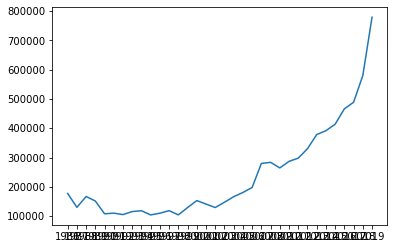

In [ ]:
import matplotlib.pyplot as plt

plt.plot(listaAno, listaQT)

In [ ]:
df.createOrReplaceTempView('tabela')
sc.sql('select TradingDate from tabela').show(5)

+-----------+
|TradingDate|
+-----------+
|   19860102|
|   19860102|
|   19860102|
|   19860102|
|   19860102|
+-----------+
only showing top 5 rows



In [ ]:
#informacao 1

df.select(func.col('NegociationCode'))\
    .filter(func.col('NegociationCode')=='PETR4')\
    .count()

5391

In [ ]:
#informacao 2

df.select(func.col('NegociationCode'), func.col('MaxPrice'))\
    .groupBy(func.col('NegociationCode'))\
    .agg(func.max(func.col('MaxPrice')).alias('ValorMaximo'))\
    .orderBy(func.col('ValorMaximo'), ascending=False)\
    .show(5)

+---------------+---------------+
|NegociationCode|    ValorMaximo|
+---------------+---------------+
|          NCT 5|  2.74484259E10|
|          MBA 5|1.2408903293E10|
|          BMG 3|          3.5E9|
|          BMG 2|          3.5E9|
|          BMG 4|          3.5E9|
+---------------+---------------+
only showing top 5 rows



In [ ]:
#informacao 3

df.select(func.col('NegociationCode'), func.col('MaxPrice'))\
    .filter(func.col('NegociationCode')=='PETR4')\
    .groupBy(func.col('NegociationCode'))\
    .agg(func.max(func.col('MaxPrice')).alias('ValorMaximo'))\
    .show(5)

+---------------+-----------+
|NegociationCode|ValorMaximo|
+---------------+-----------+
|          PETR4|    52100.0|
+---------------+-----------+



In [ ]:
#informacao 4 - Dia ('TradingDate') com a maior quantidade de papeis (NegociationCode) operados

df.select(func.col('TradingDate'), func.col('NegociationCode'))\
    .groupBy(func.col('TradingDate'))\
    .agg(func.count(func.col('NegociationCode')).alias('papeis'))\
    .orderBy(func.col('papeis'), ascending=False)\
    .show(1)


+-----------+------+
|TradingDate|papeis|
+-----------+------+
|   20191216|  4652|
+-----------+------+
only showing top 1 row



In [ ]:
from datetime import datetime

udfDiaSemana = udf(lambda x: datetime.strptime(str(x), '%Y%m%d').isocalendar()[2], StringType())


In [ ]:
#informacao 5 - Dia ('TradingDate') da semana com a maior quantidade de papeis (NegociationCode) operados
df.select(func.col('TradingDate'))\
    .withColumn('weekDay', udfDiaSemana(func.col('TradingDate')))\
    .select(func.col('weekDay'))\
    .groupBy(func.col('weekDay'))\
    .agg(func.count(func.col('weekDay')).alias('papeisOperados'))\
    .orderBy(func.col('papeisOperados'), ascending=False)\
    .show(7)

+-------+--------------+
|weekDay|papeisOperados|
+-------+--------------+
|      3|       1688444|
|      1|       1626494|
|      2|       1613747|
|      5|       1599650|
|      4|       1597353|
|      6|             3|
+-------+--------------+



In [ ]:
#informacao 6 - Maior lucro histórico de um papel (NegociationCode) na bovespa (MaxPrice - OpeningPrice)

udfLucro = udf(lambda maxPrice, openingPrice: maxPrice - openingPrice)


df.select(func.col('NegociationCode'), func.col('MaxPrice'), func.col('OpeningPrice'))\
    .withColumn('Lucro', udfLucro(func.col('MaxPrice'), func.col('OpeningPrice')))\
    .orderBy(func.col('Lucro'), ascending=False)\
    .show(1)

+---------------+--------+------------+---------+
|NegociationCode|MaxPrice|OpeningPrice|    Lucro|
+---------------+--------+------------+---------+
|          BDL 4|   3.1E8|3.00000001E8|9999999.0|
+---------------+--------+------------+---------+
only showing top 1 row



In [ ]:
#informacao 7 - Maior prejuizo histórico de um papel (NegociationCode) na bovespa (OpeningPrice - LastTradePrice)

udfPrejuizo = udf(lambda openingPrice, LastTradePrice: openingPrice - LastTradePrice)


df.select(func.col('NegociationCode'), func.col('OpeningPrice'), func.col('LastTradePrice'))\
    .withColumn('Preju', udfPrejuizo(func.col('OpeningPrice'), func.col('LastTradePrice')))\
    .orderBy(func.col('Preju'), ascending=False)\
    .show(1)

+---------------+------------+--------------+---------+
|NegociationCode|OpeningPrice|LastTradePrice|    Preju|
+---------------+------------+--------------+---------+
|          BDL 4|       1.9E8|  1.80000001E8|9999999.0|
+---------------+------------+--------------+---------+
only showing top 1 row



In [ ]:
#informacao 8 - Moeda (Currency) com mais operações

df.select(func.col('Currency'))\
    .groupBy(func.col('Currency'))\
    .agg(func.count(func.col('Currency')).alias('Moeda'))\
    .orderBy(func.col('Currency'), ascending=False)\
    .show(1)


+--------+-------+
|Currency|  Moeda|
+--------+-------+
|      R$|6995662|
+--------+-------+
only showing top 1 row



In [ ]:
#informacao 9 - Papel (NegociationCode) operado em CZ (Currency) com maior quantidade de operações

df.select(func.col('NegociationCode'), func.col('Currency'))\
    .filter(func.col('Currency')=='CZ$')\
    .groupBy(func.col('NegociationCode'))\
    .agg(func.count(func.col('NegociationCode')).alias('Total'))\
    .orderBy(func.col('Total'), ascending=False)\
    .show(1)


+---------------+-----+
|NegociationCode|Total|
+---------------+-----+
|          PMA 2| 2002|
+---------------+-----+
only showing top 1 row



In [ ]:
#informacao 10 - Papel (NegociationCode) operado em CZ (Currency) com maior valor médio das operações (MeanPrice)

df.select(func.col('NegociationCode'), func.col('Currency'), func.col('MeanPrice'))\
    .filter(func.col('Currency')=='CZ$')\
    .groupBy(func.col('NegociationCode'))\
    .agg(func.max(func.col('MeanPrice')).alias('Media'))\
    .orderBy(func.col('Media'), ascending=False)\
    .show(5)

+---------------+---------+
|NegociationCode|    Media|
+---------------+---------+
|          TLS 6| 3.7975E7|
|          ARN 2|8000000.0|
|          LOB 2|8000000.0|
|          CCC 2|7000000.0|
|          RHE 4|6902439.0|
+---------------+---------+
only showing top 5 rows



In [ ]:
#informacao 11 - Media do preço médio (MeanPrice), mínimo (MinPrice) e máximo (MaxPrice) 
#anual (TradingDate) das ações da PETR4 (NegociationCode)

df.select(func.col('NegociationCode'), func.col('MeanPrice'), func.col('MinPrice'), func.col('MaxPrice'), func.col('TradingDate'))\
    .filter(func.col('NegociationCode')=='PETR4')\
    .withColumn('ano', udfPegaAno(func.col('TradingDate')))\
    .groupBy(func.col('Ano'))\
    .agg(func.mean(func.col('MeanPrice')).alias('MediaAno'),
        func.mean(func.col('MinPrice')).alias('MinAno'),
        func.mean(func.col('MaxPrice')).alias('MaxAno'))\
    .orderBy(func.col('Ano'), ascending=False)\
    .show(5)



+----+------------------+------------------+------------------+
| Ano|          MediaAno|            MinAno|            MaxAno|
+----+------------------+------------------+------------------+
|2019|            2724.5|2693.6169354838707|2755.3669354838707|
|2018|2102.4489795918366| 2065.718367346939| 2140.804081632653|
|2017| 1459.060975609756|1441.2032520325204|1477.7642276422764|
|2016|1077.4939759036145|1054.2610441767067| 1101.140562248996|
|2015| 980.4349593495934| 957.8373983739838| 1004.719512195122|
+----+------------------+------------------+------------------+
only showing top 5 rows



In [ ]:
#informacao 12

df.select(func.col('NegociationCode'), func.col('MeanPrice'), func.col('TradingDate'))\
    .filter(func.col('NegociationCode')=='PETR4')\
    .withColumn('ano', udfPegaAno(func.col('TradingDate')))\
    .groupBy(func.col('Ano'))\
    .agg(func.mean(func.col('MeanPrice')).alias('MediaAno'))\
    .orderBy(func.col('Ano'), ascending=False)\
    .show(5)

+----+------------------+
| Ano|          MediaAno|
+----+------------------+
|2019|            2724.5|
|2018|2102.4489795918366|
|2017| 1459.060975609756|
|2016|1077.4939759036145|
|2015| 980.4349593495934|
+----+------------------+
only showing top 5 rows



In [ ]:
#informacao 13 - Preço médio (MeanPrice) anual (TradingDate) das 10 ações (NegociationCode) com 
#mais operações na bovespa
resultadoTop10 = df.select(func.col('NegociationCode'))\
    .groupBy(func.col('NegociationCode'))\
    .count()\
    .orderBy(func.col('count'), ascending = False)\
    .take(10)


In [ ]:
papelTop10 = [x['NegociationCode'] for x in resultadoTop10]
papelTop10

['PETR4T',
 'VALE5T',
 'USIM5T',
 'BBAS3T',
 'CSNA3T',
 'GGBR4T',
 'BBDC4T',
 'ITSA4T',
 'CMIG4T',
 'BRKM5T']

In [ ]:
df.filter(df.NegociationCode.isin(papelTop10))\
    .select(func.col('NegociationCode'), func.col('TradingDate'), func.col('MeanPrice'))\
    .withColumn('ano', udfPegaAno(func.col('TradingDate')))\
    .groupBy(func.col('NegociationCode'), func.col('ano'))\
    .agg(func.mean(func.col('MeanPrice')).alias('precoMedio'))\
    .show(10)

+---------------+----+------------------+
|NegociationCode| ano|        precoMedio|
+---------------+----+------------------+
|         PETR4T|2011| 2456.218079493493|
|         BBAS3T|2002|1063.5572033898304|
|         PETR4T|2019| 2763.943482224248|
|         USIM5T|2012|1008.1478809738503|
|         BBDC4T|2017|3229.6673684210527|
|         USIM5T|2013|1034.8437025796661|
|         VALE5T|1999|3489.3505154639174|
|         USIM5T|2011| 1509.077168367347|
|         USIM5T|2001| 657.5886214442013|
|         ITSA4T|2015| 842.9115044247787|
+---------------+----+------------------+
only showing top 10 rows



In [ ]:
#informacao 14

df.select(func.col('NegociationCode'), func.col('MeanPrice'), func.col('TradingDate'))\
    .filter(func.col('NegociationCode')=='PETR4')\
    .withColumn('ano', udfPegaAno(func.col('TradingDate')))\
    .groupBy(func.col('Ano'))\
    .agg(func.stddev(func.col('MeanPrice')).alias('stdDevAno'))\
    .orderBy(func.col('Ano'), ascending=False)\
    .show(5)


+----+------------------+
| Ano|         stdDevAno|
+----+------------------+
|2019|164.42760488118657|
|2018|322.32991837509013|
|2017|131.33322761191312|
|2016|379.52406656318993|
|2015|212.59195810379663|
+----+------------------+
only showing top 5 rows



In [ ]:
#informacao 15 - Desvio Padrão anual do preço médio (MeanPrice) das 10 ações (NegociationCode) 
#com mais operações na bovespa

df.filter(df.NegociationCode.isin(papelTop10))\
    .select(func.col('NegociationCode'), func.col('TradingDate'), func.col('MeanPrice'))\
    .withColumn('ano', udfPegaAno(func.col('TradingDate')))\
    .groupBy(func.col('NegociationCode'), func.col('ano'))\
    .agg(func.stddev(func.col('MeanPrice')).alias('stdDevPrice'))\
    .show(10)

+---------------+----+------------------+
|NegociationCode| ano|       stdDevPrice|
+---------------+----+------------------+
|         BBAS3T|2002|149.92180874645916|
|         PETR4T|2011|316.14847592316704|
|         PETR4T|2019|176.76398173897732|
|         USIM5T|2012| 215.1627621419734|
|         BBDC4T|2017| 269.9457573432429|
|         USIM5T|2013|170.26127294809388|
|         VALE5T|1999| 848.2025608263865|
|         USIM5T|2011|364.23170677984314|
|         USIM5T|2001|191.06973020358078|
|         ITSA4T|2015|111.20937042147659|
+---------------+----+------------------+
only showing top 10 rows



In [ ]:
#informacao 16 - Preço médio (MeanPrice) anual (TradingDate) das ações (NegociationCode) 
# com a maior quantidade de operações de acordo com a moeda (Currency)

+---------------+--------+-----------+
|NegociationCode|Currency|negociacoes|
+---------------+--------+-----------+
|          BNA 4|     CR$|       1633|
|          VGA 4|     CR$|       1179|
|         BTA 11|     CR$|         34|
|          MAS 1|     CR$|         15|
|          ALT 4|     CR$|        227|
|         TRB 10|     CR$|         33|
|          PDG 8|     CZ$|         46|
|          LIX 7|     CZ$|        411|
|          RPA 8|     CZ$|        248|
|          AGG 1|     CZ$|          4|
+---------------+--------+-----------+
only showing top 10 rows

